# Exploratory Data Analysis on Boston Housing Dataset

### This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
%matplotlib inline 

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [29]:
# Importing Boston Housing Dataset from sklearn datasets and storing inside a variable called boston

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())


dict_keys(['DESCR', 'target', 'feature_names', 'data'])


In [30]:
boston.data.shape

(506, 13)

In [31]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [32]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
#converting boston data into dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
boston_df.shape

(506, 14)

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


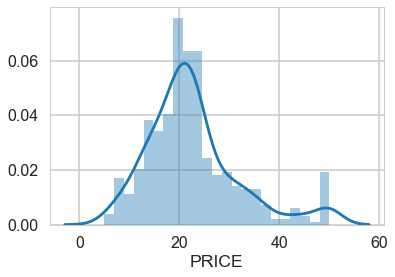

In [51]:
sns.distplot(boston_df['PRICE'])

In [37]:
Data_dict = pd.DataFrame(boston_df.dtypes)
Data_dict

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


In [38]:
Data_dict['Missing_Values'] = boston_df.isnull().sum()
Data_dict

,0,Missing_Values
CRIM,float64,0
ZN,float64,0
INDUS,float64,0
CHAS,float64,0
NOX,float64,0
RM,float64,0
AGE,float64,0
DIS,float64,0
RAD,float64,0
TAX,float64,0


In [39]:
Data_dict['Unique_Values'] = boston_df.nunique()
Data_dict

,0,Missing_Values,Unique_Values
CRIM,float64,0,504
ZN,float64,0,26
INDUS,float64,0,76
CHAS,float64,0,2
NOX,float64,0,81
RM,float64,0,446
AGE,float64,0,356
DIS,float64,0,412
RAD,float64,0,9
TAX,float64,0,66


In [40]:
Data_dict['Count'] = boston_df.count()
Data_dict

,0,Missing_Values,Unique_Values,Count
CRIM,float64,0,504,506
ZN,float64,0,26,506
INDUS,float64,0,76,506
CHAS,float64,0,2,506
NOX,float64,0,81,506
RM,float64,0,446,506
AGE,float64,0,356,506
DIS,float64,0,412,506
RAD,float64,0,9,506
TAX,float64,0,66,506


In [41]:
Data_dict = Data_dict.rename(columns ={0 : 'DataType'})
Data_dict

,DataType,Missing_Values,Unique_Values,Count
CRIM,float64,0,504,506
ZN,float64,0,26,506
INDUS,float64,0,76,506
CHAS,float64,0,2,506
NOX,float64,0,81,506
RM,float64,0,446,506
AGE,float64,0,356,506
DIS,float64,0,412,506
RAD,float64,0,9,506
TAX,float64,0,66,506


### Descriptive Statistics

In [42]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
#Spliting test and train set

from sklearn.model_selection import train_test_split
X = boston_df.drop('PRICE', axis = 1)
Y = boston_df['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


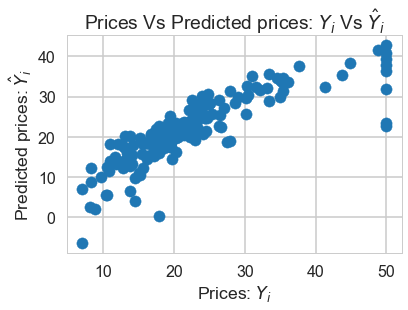

In [47]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [49]:
print("Coefficients: \n", LinReg.coef_)

Coefficients: 
 [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


In [52]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse


28.541367275618335

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


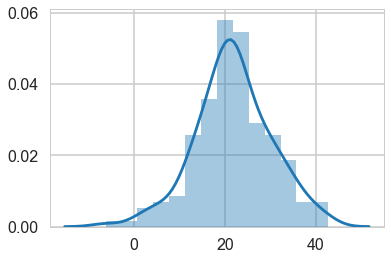

In [53]:
sns.distplot(Y_pred)